In [32]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("../roll_data/*Z-dp-basesloaded.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

seasons = [11,12,13,14]
# seasons = [11]
df = df[df['season'].isin(seasons)]

# 'rolls' is a list of 3 rolls (None if no 3rd roll). Split into three columns
df['roll'] = df['roll'].apply(lambda x: x[1:-1].split(','))
splitrolls = pd.DataFrame(df['roll'].to_list(), columns = ['roll1','roll2'], index = df.index)
df[['roll1','roll2']] = splitrolls
df[['roll1','roll2']] = df[['roll1','roll2']].apply(pd.to_numeric)
print(df['passed'])

len(df)

0     True
1    False
2    False
3    False
4     True
5     True
Name: passed, dtype: object


6

In [33]:
df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"), "pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"), "batter_vibes"] = 0
df.loc[df["fielder_mods"].astype(str).str.contains("SCATTERED"), "fielder_vibes"] = 0
df.loc[df["runner_on_first_mods"].astype(str).str.contains("SCATTERED"), "runner_on_first_vibes"] = 0


df['batter_inv_patheticism'] = 1-df['batter_patheticism']/df["batter_multiplier"]
df['batter_inv_patheticism_with_vibe'] = df['batter_inv_patheticism'] * (1 + 0.2*df['batter_vibes'])
df['batter_inv_tragicness'] = 1-df['batter_tragicness']/df["batter_multiplier"]
df['batter_inv_tragicness_with_vibe'] = df['batter_inv_tragicness'] * (1 + 0.2*df['batter_vibes'])
for attr in [
    "batter_buoyancy",
    "batter_divinity",
    "batter_martyrdom",
    "batter_moxie",
    "batter_musclitude",
    "batter_patheticism",
    "batter_thwackability",
    "batter_tragicness",
    "batter_coldness",
    "batter_overpowerment",
    "batter_ruthlessness",
    "batter_shakespearianism",
    "batter_suppression",
    "batter_unthwackability",
    "batter_base_thirst",
    "batter_continuation",
    "batter_ground_friction",
    "batter_indulgence",
    "batter_laserlikeness",
    "batter_anticapitalism",
    "batter_chasiness",
    "batter_omniscience",
    "batter_tenaciousness",
    "batter_watchfulness",
    "batter_pressurization",
    "batter_cinnamon",
]:
    df[attr] = df[attr] * df["batter_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["batter_vibes"])

for attr in [
    "runner_on_first_base_thirst",
    "runner_on_first_continuation",
    "runner_on_first_ground_friction",
    "runner_on_first_indulgence",
    "runner_on_first_laserlikeness",
]:
    df[attr] = df[attr] * df["runner_on_first_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["runner_on_first_vibes"])
for attr in [
    "pitcher_buoyancy",
    "pitcher_divinity",
    "pitcher_martyrdom",
    "pitcher_moxie",
    "pitcher_musclitude",
    "pitcher_patheticism",
    "pitcher_thwackability",
    "pitcher_tragicness",
    "pitcher_ruthlessness",
    "pitcher_overpowerment",
    "pitcher_unthwackability",
    "pitcher_shakespearianism",
    "pitcher_suppression",
    "pitcher_coldness",
    "pitcher_base_thirst",
    "pitcher_continuation",
    "pitcher_ground_friction",
    "pitcher_indulgence",
    "pitcher_laserlikeness",
    "pitcher_anticapitalism",
    "pitcher_chasiness",
    "pitcher_omniscience",
    "pitcher_tenaciousness",
    "pitcher_watchfulness",
    "pitcher_pressurization",
    "pitcher_cinnamon",
]:
    df[attr] = df[attr] * df["pitcher_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["pitcher_vibes"])

for attr in [
    "fielder_anticapitalism",
    "fielder_chasiness",
    "fielder_omniscience",
    "fielder_tenaciousness",
    "fielder_watchfulness",
]:
    df[attr + "_times_vibe"] = df[attr] * df["fielder_vibes"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["fielder_vibes"])

/tmp/ipykernel_13859/1714173876.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["runner_on_first_vibes"])
/tmp/ipykernel_13859/1714173876.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["runner_on_first_vibes"])
/tmp/ipykernel_13859/1714173876.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all col

In [34]:
dfc = df.copy()
# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING"]:
    dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["fielder_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["runner_on_first_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]

dfc = dfc[
    (dfc["pitcher_multiplier"] == 1)
    & (dfc["batter_multiplier"] == 1)
    & (dfc["fielder_multiplier"] == 1)
    & (dfc["runner_on_first_multiplier"] == 1)
]
# dfc = dfc[(dfc['pitcher_vibes'].abs() < 0.2) & (dfc['batter_vibes'].abs() < 0.2)]
# for limit_attr in ['batter_patheticism', 'batter_thwackability', 'batter_divinity', 'batter_musclitude', 'pitcher_ruthlessness']:
#     dfc = dfc[(dfc[limit_attr] > 0.1) & (dfc[limit_attr] < 0.9)]
# dfc = dfc[dfc['batter_thwackability'] + dfc['batter_musclitude'] + dfc['batter_divinity'] > dfc['batter_patheticism']]

len(dfc)

0

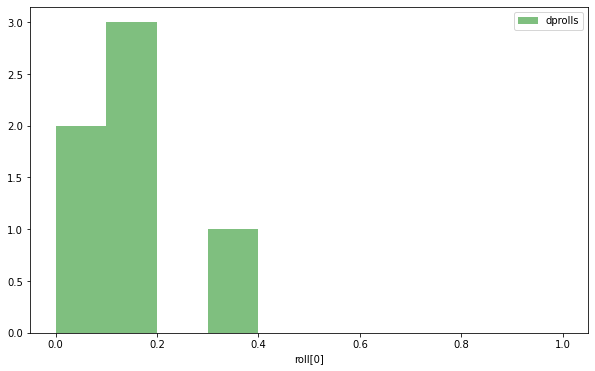

In [35]:
# This shows the first roll is related to DP vs other based on the dp_runneronfirst notebook
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    df['roll1'],
    bins=10,
    range=[0.,1.],
    color="green",
    label="dprolls",
    alpha = 0.5
)

ax.set_xlabel('bin counts')
ax.set_xlabel("roll[0]")

ax.legend()

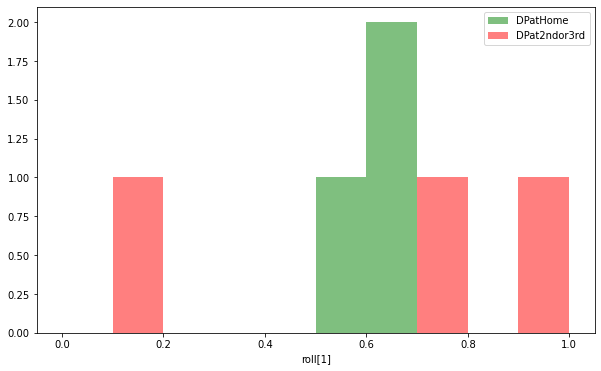

In [36]:
# This checks the second roll and shows a middle 1/3rd is for out at 3rd.
# Separately frostbird confirmed that the <0.33 was for out at home.
# Meaning >0.67 is for out at 2nd
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    df[df['passed']]['roll2'],
    bins=10,
    range=[0.,1.],
    color="green",
    label="DPatHome",
    alpha = 0.5
)
ax.hist(
    df[df['passed'] == False]['roll2'],
    bins=10,
    range=[0.,1.],
    color="red",
    label="DPat2ndor3rd",
    alpha = 0.5
)

ax.set_xlabel('bin counts')
ax.set_xlabel("roll[1]")

ax.legend()

In [37]:
X = dfc[
    [
        "roll1",
        "passed",
        # "batter_patheticism_with_vibe",
        # "batter_tragicness_with_vibe",
        "batter_inv_tragicness",
        "pitcher_shakespearianism_with_vibe",
        # 'fielder_anticapitalism_with_vibe',
        # 'fielder_chasiness_with_vibe',
        # 'fielder_omniscience_with_vibe',
        'fielder_tenaciousness_with_vibe',
        # 'fielder_watchfulness_with_vibe',
        # 'ballpark_grandiosity',
        # 'ballpark_fortification',
        # 'ballpark_obtuseness',
        # 'ballpark_ominousness',
        # 'ballpark_inconvenience',
        # 'ballpark_viscosity',
        # 'ballpark_forwardness',
        # 'ballpark_mysticism',
        'ballpark_elongation',
        # 'runner_on_first_tragicness_with_vibe',
        # 'runner_on_first_laserlikeness_with_vibe',
        # 'runner_on_first_continuation_with_vibe',
        # 'runner_on_first_ground_friction_with_vibe',
        # 'runner_on_first_indulgence_with_vibe',
        # 'ballpark_filthiness',
    ]
]

# X = X[X['roll'] < 0.85]

# X = dfc[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = dfc[['roll', 'pitcher_ruthlessness']]

# Test out a specific coefficient
# X["roll1"] = X["roll1"]-0.4*X["pitcher_shakespearianism_with_vibe"]
# X.drop("pitcher_shakespearianism_with_vibe", axis="columns", inplace=True)
# X["roll1"] = X["roll1"]-0.1*X["fielder_tenaciousness_with_vibe"]
# X.drop("fielder_tenaciousness_with_vibe", axis="columns", inplace=True)
y = X["passed"]
X = X.drop("passed", axis=1)
X

,roll1,batter_inv_tragicness,pitcher_shakespearianism_with_vibe,fielder_tenaciousness_with_vibe,ballpark_elongation


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

#trainedsvm = svm.LinearSVC(intercept_scaling=1000, dual=False, max_iter=100000, C=1000, class_weight="balanced").fit(
trainedsvm = svm.LinearSVC(dual=False, max_iter=100000, C=1000, class_weight="balanced").fit(
    X2, y
)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y, predictionsvm))
print(classification_report(y, predictionsvm))
print(trainedsvm.score(X2, y))

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.

In [ ]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
print(intercept_scaled)
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[3.89733004]


[(-11.112096015370739, 'ballpark_elongation'),
 (2.3004088784343257, 'pitcher_shakespearianism_with_vibe'),
 (-1.738935702823711, 'fielder_tenaciousness_with_vibe'),
 (1.0, 'roll1'),
 (0.8964575979126971, 'batter_inv_tragicness')]

[-3.89733004]
(-0.8964575979126971, 'batter_inv_tragicness')
(-2.3004088784343257, 'pitcher_shakespearianism_with_vibe')
(1.738935702823711, 'fielder_tenaciousness_with_vibe')
(11.112096015370739, 'ballpark_elongation')


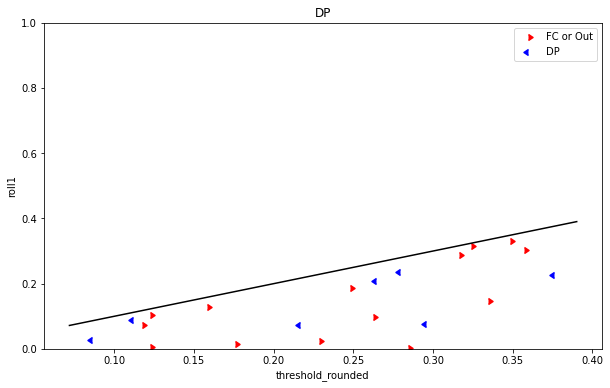

In [ ]:
# Manual threshold
dfc["threshold_rounded"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.18 * (dfc["ballpark_elongation"] - 0.5)

# {
#     return "It's okay Joel"
# }

# SVC threshold
dfc["threshold"] = -intercept_scaled[0]
print(-intercept_scaled)
for pair in zip(-np.array(coef_list), X.columns):
    if pair[1] != "roll1":
        print(pair)
        dfc["threshold"] += pair[0] * dfc[pair[1]]

x_val = "threshold_rounded"
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.scatter(
    dfc[~dfc["passed"]][x_val],
    dfc[~dfc["passed"]]["roll1"],
    color="red",
    label="FC or Out",
    marker=CARETRIGHTBASE,
)
ax.scatter(
    dfc[dfc["passed"]][x_val],
    dfc[dfc["passed"]]["roll1"],
    color="blue",
    label="DP",
    marker=CARETLEFTBASE,
)
ax.set_xlabel(x_val)
ax.set_ylabel("roll1")
ax.set_title("DP")
# ax.set_xlim(0.484, 0.499)
ax.set_ylim(0, 1)

ax.plot(ax.get_xlim(), ax.get_xlim(), "k")

ax.legend()
# fig.savefig('../figures/dp.png')

14


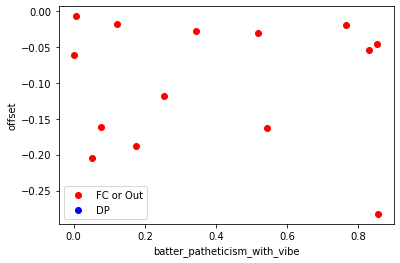

In [ ]:
dfc["offset"] = dfc["roll1"] - dfc["threshold_rounded"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]
print(len(outliers))

fig, ax = plt.subplots(1, facecolor='white')
x_val = "batter_patheticism_with_vibe"
ax.scatter(
    outliers[~outliers["passed"]][x_val],
    outliers[~outliers["passed"]]["offset"],
    color="red",
    label="FC or Out",
)
ax.scatter(
    outliers[outliers["passed"]][x_val],
    outliers[outliers["passed"]]["offset"],
    color="blue",
    label="DP",
)
ax.set_xlabel(x_val)
ax.set_ylabel("offset")
ax.legend()

In [ ]:
table = outliers
print(len(table))
#table = table[table['event_type'] == 'Out']
table[
    [
        "season",
        "day",
        "offset",
        "roll",
        "threshold_rounded",
        "event_type",
        "out_count",
        #"baserunner_count",
        #"top_of_inning",
        # "inning",
        # "home_score",
        # "away_score",
        #"event_type",
        #"ballpark_filthiness",
        "pitcher_name",
        "fielder_name",
        "batter_name",
        "runner_on_first_name",
        "weather",
        "batter_mods",
        "pitcher_mods",
        "fielder_mods",
        "runner_on_first_mods",
        "batting_team_mods",
        "pitching_team_mods",
        "game_id",
        "play_count",
    ]
].sort_values("threshold_rounded", ascending=True)
# len(table)

14


,season,day,offset,roll,threshold_rounded,event_type,out_count,pitcher_name,fielder_name,batter_name,runner_on_first_name,weather,batter_mods,pitcher_mods,fielder_mods,runner_on_first_mods,batting_team_mods,pitching_team_mods,game_id,play_count
13,13,33,-0.045341,"[0.07211045118121784, 0.40785106180932273]",0.117451,DP,0,PolkaDot Zavala,Grey Alvarado,Quack Enjoyable,Oliver Notarobot,Weather.FEEDBACK,NaN,NaN,REPEATING,ALTERNATE,NaN,NaN,eb5bed3e-8af9-4937-8c63-8bfa00bfa065,203
0,11,95,-0.018902,"[0.10333824714054018, 0.4122704900570269]",0.122241,DP,0,Leach Ingram,Jessica Telephone,Charlatan Seabright,Sandie Turner,Weather.FEEDBACK,SPICY,NaN,SUPERALLERGIC;HONEY_ROASTED,SPICY;PERK,BIRD_SEED,PARTY_TIME,746652fc-5da4-449b-8470-5c1badf48291,18
14,13,33,-0.117552,"[0.005019653002037661, 0.3386823219478152]",0.122572,DP,0,Grollis Zephyr,Engine Eberhardt,Rat Mason,Valentine Games,Weather.SUN_2,NaN,NaN,NaN,NaN,SUN_KISSED,NaN,5e393276-5973-4491-a215-8b5d325477b3,212
9,13,23,-0.030112,"[0.12814027818055806, 0.1724762984861341]",0.158253,DP,0,Liam Snail,Don Elliott,Basilio Mason,Rat Mason,Weather.FLOODING,NaN,NaN,NaN,NaN,SUN_KISSED,LIFE_OF_PARTY;ELECTRIC,f5c48b5d-bfa5-46fd-b623-a895fa53ec0a,257
17,13,46,-0.161780,"[0.014083068463304427, 0.4667343171438234]",0.175863,DP,0,Nolanestophia Patterson,Malik Destiny,Bottles Suljak,Gia Holbrook,Weather.FLOODING,NaN,NaN,ALTERNATE;FIRE_EATER,NaN,MAINTENANCE_MODE,NaN,11db81cc-a126-4f0f-866d-30ea7b6691e1,100
27,14,90,-0.205136,"[0.023343725586983943, 0.09651096315434371]",0.228480,DP,0,Ephraim Ladd,Kaz Fiasco,Igneus Delacruz,Eugenia Bickle,Weather.FLOODING,ALTERNATE;CHUNKY,NaN,NaN,ALTERNATE,BASE_INSTINCTS,BOTTOM_DWELLER;BLACKHOLE_PAYOUTS;PARTY_TIME,9f09911a-512a-4c16-ba2e-d55f4244b6ee,217
20,13,82,-0.060675,"[0.1870934688257826, 0.15207427791329886]",0.247768,DP,0,Geraldine Frost,Hercules Alighieri,Valentine Games,M---w-ll M-son,Weather.FLOODING,NaN,NaN,NaN,SCATTERED,SUN_KISSED,UNDERSEA;PARTY_TIME,ec5107bd-18f1-482b-ad98-2dee7aaef1a8,28
24,14,42,-0.163356,"[0.09901901003962266, 0.3826547550180732]",0.262375,DP,0,Geraldine Frost,Jan Canberra,Basilio Fig,Basilio Mason,Weather.SALMON,FIRE_EATER,NaN,NaN,NaN,SUN_KISSED;SUN2_PAYOUTS,UNDERSEA,a15959df-069c-401a-a776-a60cedc4d54a,115
5,13,15,-0.282716,"[0.0015461596989303494, 0.09970577975673933]",0.284262,DP,0,Ephraim Ladd,Pitching Machine,Kaj Statter Jr.,Dudley Mueller,Weather.FLOODING,SMOOTH,NaN,HONEY_ROASTED;EGO1;UNCERTAIN,SIPHON,BASE_INSTINCTS,BOTTOM_DWELLER,8278fdfc-a718-49b3-9b13-1fea9355f82c,176
15,13,40,-0.027012,"[0.2890543059398125, 0.1808256712521037]",0.316066,DP,0,Ephraim Ladd,Muse Scantron,Reese Clark,Morrow Wilson,Weather.BLACK_HOLE,FIRE_EATER,NaN,NaN,NaN,NaN,BOTTOM_DWELLER,684a03c3-230b-4e02-8d17-8adc542038ec,128


In [ ]:
list(df.columns)

['event_type',
 'roll',
 'passed',
 'batter_buoyancy',
 'batter_divinity',
 'batter_martyrdom',
 'batter_moxie',
 'batter_musclitude',
 'batter_patheticism',
 'batter_thwackability',
 'batter_tragicness',
 'batter_coldness',
 'batter_overpowerment',
 'batter_ruthlessness',
 'batter_shakespearianism',
 'batter_suppression',
 'batter_unthwackability',
 'batter_base_thirst',
 'batter_continuation',
 'batter_ground_friction',
 'batter_indulgence',
 'batter_laserlikeness',
 'batter_anticapitalism',
 'batter_chasiness',
 'batter_omniscience',
 'batter_tenaciousness',
 'batter_watchfulness',
 'batter_pressurization',
 'batter_cinnamon',
 'batter_multiplier',
 'runner_on_first_buoyancy',
 'runner_on_first_divinity',
 'runner_on_first_martyrdom',
 'runner_on_first_moxie',
 'runner_on_first_musclitude',
 'runner_on_first_patheticism',
 'runner_on_first_thwackability',
 'runner_on_first_tragicness',
 'runner_on_first_coldness',
 'runner_on_first_overpowerment',
 'runner_on_first_ruthlessness',
 '